In [12]:
import os
import numpy as np
from pesq import pesq
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Set paths to your files
dry_dir = '' # Dry Clips Folder Path
rendered_dir = '' # Rendered FDN Samples Folder Path
output_csv = "pesq_scores_fdn.csv"

In [16]:
# Number of samples
num_samples = 50

# Container for PESQ scores
pesq_scores = []

In [18]:
for i in range(num_samples):
    dry_path = os.path.join(dry_dir, f"sample_{i:03d}.wav")
    fdn_path = os.path.join(rendered_dir, f"rendered_fdn_{i:03d}_sample_{i:03d}.wav")

    try:
        # Load audio
        fs_dry, dry = wavfile.read(dry_path)
        fs_fdn, fdn = wavfile.read(fdn_path)

        # Check sample rate
        if fs_dry != 16000 or fs_fdn != 16000:
            print(f"❌ Sample rate mismatch at index {i}")
            pesq_scores.append((i, None))
            continue

        # Convert stereo to mono if needed
        if fdn.ndim == 2:
            fdn = fdn.mean(axis=1)

        # Trim to equal length
        min_len = min(len(dry), len(fdn))
        dry = dry[:min_len]
        fdn = fdn[:min_len]

        # Compute PESQ score
        score = pesq(16000, dry, fdn, 'wb')
        pesq_scores.append((i, score))
        print(f"✔ Sample {i:03d}: PESQ = {score:.3f}")

    except Exception as e:
        print(f"❌ Error at sample {i:03d}: {e}")
        pesq_scores.append((i, None))

✔ Sample 000: PESQ = 2.968
✔ Sample 001: PESQ = 2.850
✔ Sample 002: PESQ = 3.061
✔ Sample 003: PESQ = 2.860
✔ Sample 004: PESQ = 2.893
✔ Sample 005: PESQ = 2.836
✔ Sample 006: PESQ = 2.762
✔ Sample 007: PESQ = 2.957
✔ Sample 008: PESQ = 3.018
✔ Sample 009: PESQ = 2.828
✔ Sample 010: PESQ = 3.201
✔ Sample 011: PESQ = 2.837
✔ Sample 012: PESQ = 2.996
✔ Sample 013: PESQ = 3.442
✔ Sample 014: PESQ = 2.951
✔ Sample 015: PESQ = 3.030
✔ Sample 016: PESQ = 2.893
✔ Sample 017: PESQ = 3.210
✔ Sample 018: PESQ = 3.049
✔ Sample 019: PESQ = 3.088
✔ Sample 020: PESQ = 2.837
✔ Sample 021: PESQ = 3.042
✔ Sample 022: PESQ = 2.929
✔ Sample 023: PESQ = 3.116
✔ Sample 024: PESQ = 2.686
✔ Sample 025: PESQ = 3.001
✔ Sample 026: PESQ = 2.946
✔ Sample 027: PESQ = 2.791
✔ Sample 028: PESQ = 3.011
✔ Sample 029: PESQ = 3.044
✔ Sample 030: PESQ = 2.797
✔ Sample 031: PESQ = 2.965
✔ Sample 032: PESQ = 3.209
✔ Sample 033: PESQ = 2.904
✔ Sample 034: PESQ = 3.004
✔ Sample 035: PESQ = 2.554
✔ Sample 036: PESQ = 3.404
✔

In [19]:
# Save PESQ scores to CSV
df = pd.DataFrame(pesq_scores, columns=["Sample", "PESQ"])
df.to_csv(output_csv, index=False)
print(f"✔ PESQ scores saved to: {output_csv}")

# Compute and save summary statistics
summary = {
    "Sample": ["Mean", "Median", "Std Dev", "Min", "Max"],
    "PESQ": [
        df["PESQ"].mean(),
        df["PESQ"].median(),
        df["PESQ"].std(),
        df["PESQ"].min(),
        df["PESQ"].max()
    ]
}

summary_df = pd.DataFrame(summary)

# Append summary statistics to the same CSV
with open(output_csv, 'a') as f:
    f.write("\n")  # separate with blank line
summary_df.to_csv(output_csv, index=False, mode='a', header=True)
print("✔ Summary statistics appended to CSV.")

✔ PESQ scores saved to: pesq_scores_fdn.csv
✔ Summary statistics appended to CSV.


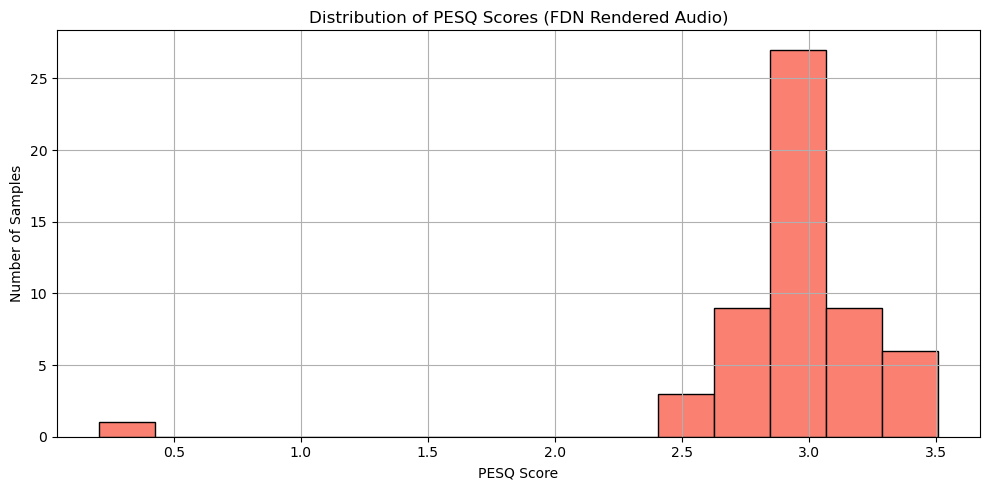

In [22]:
# Load your PESQ scores (if not already loaded)
df = pd.read_csv("pesq_scores_fdn.csv")

# Filter numeric values (exclude summary rows)
df = df[pd.to_numeric(df["PESQ"], errors="coerce").notnull()].copy()
df["PESQ"] = df["PESQ"].astype(float)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(df["PESQ"], bins=15, color='salmon', edgecolor='black')
plt.title("Distribution of PESQ Scores (FDN Rendered Audio)")
plt.xlabel("PESQ Score")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.tight_layout()
plt.show()